# Introduction

This is an analysis of the military spending of a select group of nations over the course of a five year span.  We will be looking at the military spending of the following nations and making inferences on their behavior based on the information available to us.

In [1]:
#import relevant packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Import
Below are the datasets used to conduct our information mining exercises. We obtained the data from SIPRI.com and worldbank.org 

In [2]:
#import datasets
military_expenditure_per_capita = pd.read_csv('Per_Capita.csv')
military_spending = pd.read_csv('militay spending.csv')
share_of_gdp = pd.read_csv('Share of GDP.csv')
GDP = pd.read_csv('GDP cont.csv')
gdp_per_capita = pd.read_csv('GDP per capita.csv') 

## Questions
### A. Import the military spending of the following 10 nations; China, Russia, Germany, United Kingdom, France, Italy, Iran, Saudi Arabia, Israel and South Korea

In [3]:
# after confirming the dataframe
# clean the dataset by picking out the 10 countries of interest and the relevant years
# insert them into a new dataframe
cont10 = military_spending.iloc[[82, 137, 146, 159, 145, 150, 162, 170, 164, 85], [0, 65, 66, 67, 68, 69]]
cont10

,Country,2013,2014,2015,2016,2017
82,"China, P.R.",179880.5,200772.2,214093.1,216031.3,228230.7
137,Russian Federation,88352.9,84696.5,66418.7,69245.3,66335.0
146,Germany,45930.5,46102.7,39812.6,41579.5,44329.3
159,UK,56861.8,59182.9,53862.2,48118.9,47193.1
145,France,62417.1,63613.6,55342.1,57358.4,57770.1
150,Italy,33891.9,31572.4,25294.6,28205.8,29236.4
162,Iran,11997.2,9901.1,10588.8,12264.0,14548.1
170,Saudi Arabia,67020.0,80762.4,87185.9,63672.8,69413.3
164,Israel,17302.2,18481.1,16963.2,14782.8,16489.0
85,"Korea, South",34136.6,37552.3,36570.8,36934.4,39152.5


In [4]:
# We assign the same name to each observation in order to maintain consistency
cont10['Country'] = ['China', 'Russia', 'Germany', 'United Kingdom', 'France', 'Italy',
                     'Iran', 'Saudi Arabia', 'Israel', 'South Korea']

In [5]:
# reset the index to remove traces of the old dataframe
cont10 = cont10.reset_index()
cont10

,index,Country,2013,2014,2015,2016,2017
0,82,China,179880.5,200772.2,214093.1,216031.3,228230.7
1,137,Russia,88352.9,84696.5,66418.7,69245.3,66335.0
2,146,Germany,45930.5,46102.7,39812.6,41579.5,44329.3
3,159,United Kingdom,56861.8,59182.9,53862.2,48118.9,47193.1
4,145,France,62417.1,63613.6,55342.1,57358.4,57770.1
5,150,Italy,33891.9,31572.4,25294.6,28205.8,29236.4
6,162,Iran,11997.2,9901.1,10588.8,12264.0,14548.1
7,170,Saudi Arabia,67020.0,80762.4,87185.9,63672.8,69413.3
8,164,Israel,17302.2,18481.1,16963.2,14782.8,16489.0
9,85,South Korea,34136.6,37552.3,36570.8,36934.4,39152.5


In [6]:
#remove unnecessary columns or variables
del cont10['index']

In [7]:
cont10 = cont10.set_index('Country')

In [8]:
#check the data types of every column
cont10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, China to South Korea
Data columns (total 5 columns):
2013    10 non-null object
2014    10 non-null object
2015    10 non-null object
2016    10 non-null object
2017    10 non-null object
dtypes: object(5)
memory usage: 480.0+ bytes


In [9]:
# we notice that the variables in the columns 2013 - 2017 are non-null and we thus change them to float i.e. decimal values
cont10 = cont10.astype(float)

In [10]:
#confirm the successful change of datatypes
cont10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, China to South Korea
Data columns (total 5 columns):
2013    10 non-null float64
2014    10 non-null float64
2015    10 non-null float64
2016    10 non-null float64
2017    10 non-null float64
dtypes: float64(5)
memory usage: 480.0+ bytes


In [11]:
cont10

,2013,2014,2015,2016,2017
Country,,,,,
China,179880.5,200772.2,214093.1,216031.3,228230.7
Russia,88352.9,84696.5,66418.7,69245.3,66335.0
Germany,45930.5,46102.7,39812.6,41579.5,44329.3
United Kingdom,56861.8,59182.9,53862.2,48118.9,47193.1
France,62417.1,63613.6,55342.1,57358.4,57770.1
Italy,33891.9,31572.4,25294.6,28205.8,29236.4
Iran,11997.2,9901.1,10588.8,12264.0,14548.1
Saudi Arabia,67020.0,80762.4,87185.9,63672.8,69413.3
Israel,17302.2,18481.1,16963.2,14782.8,16489.0


In [12]:
#create functions to plot and visualize the data

def plot_percapita(df, limit=10):
    df = df.ix[:, ['2013', '2014', '2015', '2016', '2017']][:limit]
    df.plot(kind='bar', sort_columns=True)
    plt.ylabel('per million')
    plt.show()

C:\Users\Aluya\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


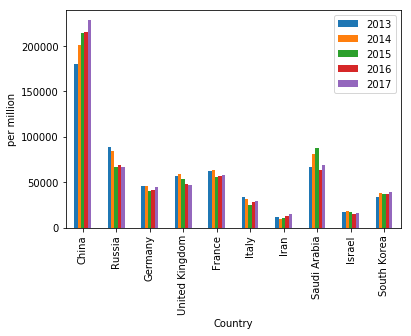

In [13]:
plot_percapita(cont10)

### B. Compare the military spending of the 10 nations to their country’s GDP

In [14]:
# check to ensure the GDP data iscorrect
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.040000e+11,1.140000e+11,1.250000e+11,1.270000e+11,1.030000e+11,9.533720e+10,1.240000e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


In [15]:
# after confirming the dataframe
# clean the dataset by picking out the 10 countries of interest and the relevant years
# insert them into a new dataframe
gdp10 = GDP.iloc[[38, 200, 53, 79, 75, 114, 110, 203, 113, 124], [0, 57, 58, 59, 60, 61]]

In [16]:
# We assign the same name to each observation in order to maintain consistency
gdp10['Country Name'] = ['China', 'Russia', 'Germany', 'United Kingdom', 'France', 'Italy',
                         'Iran', 'Saudi Arabia', 'Israel', 'South Korea']

In [17]:
# Assign column names to maintain consistency among the various dataframes
gdp10.columns = ['Country', '2013', '2014', '2015', '2016', '2017']

In [18]:
# reset the index to remove traces of the old dataframe
gdp10 = gdp10.reset_index()
gdp10

,index,Country,2013,2014,2015,2016,2017
0,38,China,9.610000e+12,1.050000e+13,1.110000e+13,1.120000e+13,1.220000e+13
1,200,Russia,2.300000e+12,2.060000e+12,1.370000e+12,1.280000e+12,1.580000e+12
2,53,Germany,3.750000e+12,3.890000e+12,3.380000e+12,3.480000e+12,3.680000e+12
3,79,United Kingdom,2.740000e+12,3.020000e+12,2.890000e+12,2.650000e+12,2.620000e+12
4,75,France,2.810000e+12,2.850000e+12,2.440000e+12,2.470000e+12,2.580000e+12
5,114,Italy,2.130000e+12,2.150000e+12,1.830000e+12,1.860000e+12,1.930000e+12
6,110,Iran,4.670000e+11,4.340000e+11,3.860000e+11,4.190000e+11,4.400000e+11
7,203,Saudi Arabia,7.470000e+11,7.560000e+11,6.540000e+11,6.450000e+11,6.840000e+11
8,113,Israel,2.920000e+11,3.080000e+11,2.990000e+11,3.180000e+11,3.510000e+11
9,124,South Korea,1.310000e+12,1.410000e+12,1.380000e+12,1.410000e+12,1.530000e+12


In [19]:
# delete unnecessary columns 
del gdp10['index']

In [20]:
gdp10 = gdp10.set_index('Country')

C:\Users\Aluya\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


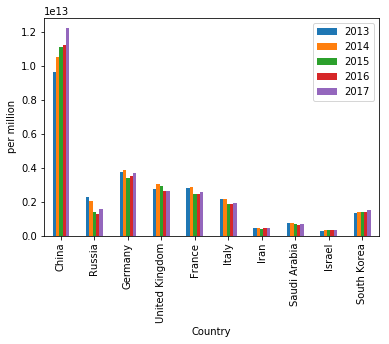

In [21]:
plot_percapita(gdp10)

In [22]:
share10 = share_of_gdp.iloc[[83, 137, 147, 160, 146, 151, 164, 172, 166, 86], [0, 66, 67, 68, 69, 70]]
share10

,Country,2013,2014,2015,2016,2017
83,"China, P.R.",0.019,0.019,0.019,0.019,0.019
137,Russian Federation,0.039,0.041,0.049,0.055,0.043
147,Germany,0.012,0.012,0.012,0.012,0.012
160,UK,0.021,0.020,0.019,0.018,0.018
146,France,0.022,0.022,0.023,0.023,0.023
151,Italy,0.016,0.015,0.014,0.015,0.015
164,Iran,0.022,0.022,0.026,0.028,0.031
172,Saudi Arabia,0.090,0.107,0.135,0.099,0.103
166,Israel,0.059,0.060,0.057,0.047,0.047
86,"Korea, South",0.026,0.027,0.026,0.026,0.026


In [23]:
# We assign the same name to each observation in order to maintain consistency
share10['Country'] = ['China', 'Russia', 'Germany', 'United Kingdom', 'France', 
                     'Italy', 'Iran', 'Saudi Arabia', 'Israel', 'South Korea']
# reset the index to remove traces of the old dataframe
share10 = share10.reset_index()
share10

,index,Country,2013,2014,2015,2016,2017
0,83,China,0.019,0.019,0.019,0.019,0.019
1,137,Russia,0.039,0.041,0.049,0.055,0.043
2,147,Germany,0.012,0.012,0.012,0.012,0.012
3,160,United Kingdom,0.021,0.020,0.019,0.018,0.018
4,146,France,0.022,0.022,0.023,0.023,0.023
5,151,Italy,0.016,0.015,0.014,0.015,0.015
6,164,Iran,0.022,0.022,0.026,0.028,0.031
7,172,Saudi Arabia,0.090,0.107,0.135,0.099,0.103
8,166,Israel,0.059,0.060,0.057,0.047,0.047
9,86,South Korea,0.026,0.027,0.026,0.026,0.026


In [24]:
# delete unnecessary columns 
del share10['index']
share10 = share10.set_index('Country')
share10

,2013,2014,2015,2016,2017
Country,,,,,
China,0.019,0.019,0.019,0.019,0.019
Russia,0.039,0.041,0.049,0.055,0.043
Germany,0.012,0.012,0.012,0.012,0.012
United Kingdom,0.021,0.020,0.019,0.018,0.018
France,0.022,0.022,0.023,0.023,0.023
Italy,0.016,0.015,0.014,0.015,0.015
Iran,0.022,0.022,0.026,0.028,0.031
Saudi Arabia,0.090,0.107,0.135,0.099,0.103
Israel,0.059,0.060,0.057,0.047,0.047


In [25]:
share10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, China to South Korea
Data columns (total 5 columns):
2013    10 non-null object
2014    10 non-null object
2015    10 non-null object
2016    10 non-null object
2017    10 non-null object
dtypes: object(5)
memory usage: 480.0+ bytes


In [26]:
share10 = share10.astype(float)

In [27]:
share10 = share10 * 100

In [28]:
share10

,2013,2014,2015,2016,2017
Country,,,,,
China,1.9,1.9,1.9,1.9,1.9
Russia,3.9,4.1,4.9,5.5,4.3
Germany,1.2,1.2,1.2,1.2,1.2
United Kingdom,2.1,2.0,1.9,1.8,1.8
France,2.2,2.2,2.3,2.3,2.3
Italy,1.6,1.5,1.4,1.5,1.5
Iran,2.2,2.2,2.6,2.8,3.1
Saudi Arabia,9.0,10.7,13.5,9.9,10.3
Israel,5.9,6.0,5.7,4.7,4.7


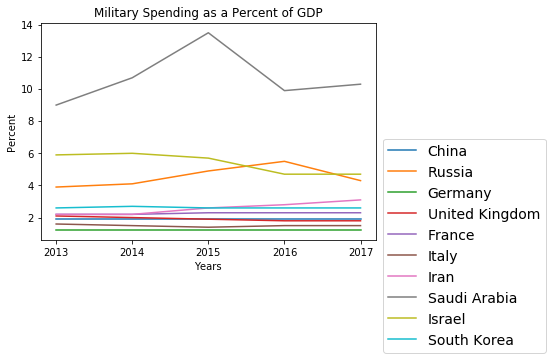

In [29]:
# plot the percentage share of gdp data
# Transpose the data frame to display the years on the x axis of the graph.
share10.T.plot()

# Create labels for each axis
plt.ylabel('Percent')
plt.xlabel('Years')
plt.title('Military Spending as a Percent of GDP')
plt.legend(prop={'size': 14}, bbox_to_anchor=(1,0.5))
plt.xticks(np.arange(5), ('2013', '2014', '2015', '2016', '2017'))

# Set the size of the graph
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.show()

### C. Compare the military spending of each nation to the overall military spending by those countries

For this exercise we use a pie chart to represent each country as a percentage of the overall military spending for each year

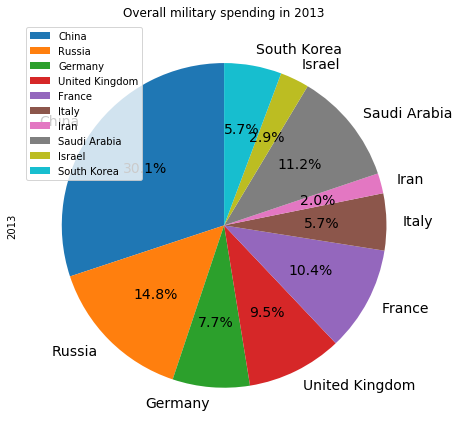

In [30]:
# create a figure that displays each nations military spending as a percentage of the total military spending of all 10 countries
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
cont10.plot(kind='pie', y ='2013', ax=ax1, autopct='%1.1f%%', 
startangle=90, title = 'Overall military spending in 2013', shadow=False, fontsize=14)
plt.legend(loc='best')

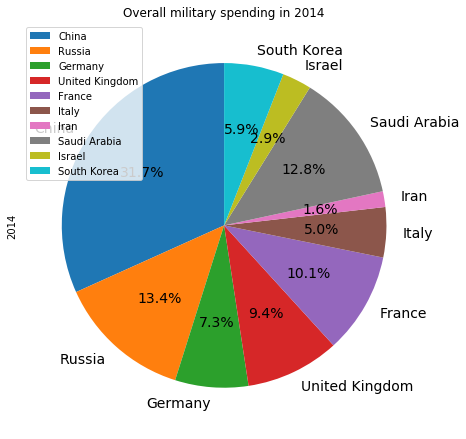

In [31]:
# plot the overall spending for 2014
plt.figure(figsize=(16,8))

# plot chart
ax1 = plt.subplot(121, aspect='equal')
cont10.plot(kind='pie', y ='2014', ax=ax1, autopct='%1.1f%%', 
startangle=90, title = 'Overall military spending in 2014', shadow=False, fontsize=14)
plt.legend(loc='best')

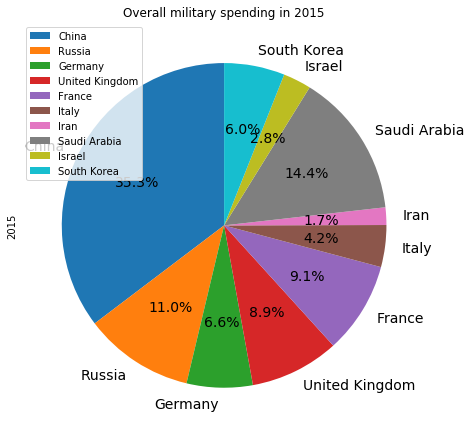

In [32]:
# plot the overall spending for 2015

plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
cont10.plot(kind='pie', y ='2015', ax=ax1, autopct='%1.1f%%', 
startangle=90, title = 'Overall military spending in 2015', shadow=False, fontsize=14)
plt.legend(loc='best')

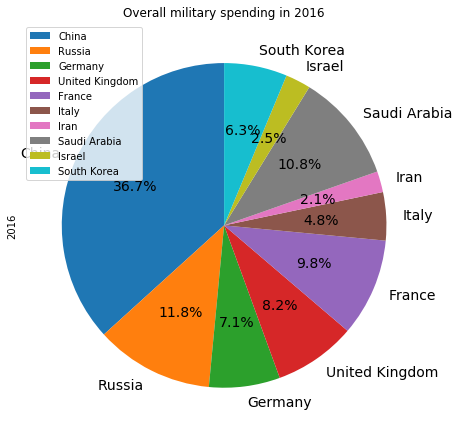

In [33]:
# plot the overall spending for 2016
plt.figure(figsize=(16,8))

# plot chart
ax1 = plt.subplot(121, aspect='equal')
cont10.plot(kind='pie', y ='2016', ax=ax1, autopct='%1.1f%%', 
startangle=90, title = 'Overall military spending in 2016', shadow=False, fontsize=14)
plt.legend(loc='best')

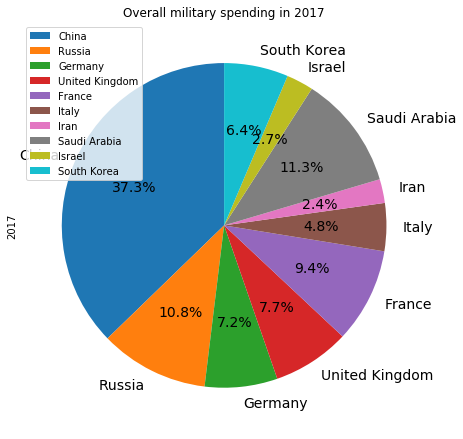

In [34]:
# plot the overall spending for 2017
plt.figure(figsize=(16,8))

# plot chart
ax1 = plt.subplot(121, aspect='equal')
cont10.plot(kind='pie', y ='2017', ax=ax1, autopct='%1.1f%%', 
startangle=90, title = 'Overall military spending in 2017', shadow=False, fontsize=14)
plt.legend(loc='best')

### D. Compare the per person military spending to the per person GDP

In [35]:
# after confirming the dataframe
# clean the dataset by picking out the 10 countries of interest and the relevant years
# insert them into a new dataframe
per_cap_milit10 = military_expenditure_per_capita.iloc[[83, 141, 150, 163, 149, 154, 167, 175, 169, 86], [0, 26, 27, 28, 29, 30]]
per_cap_milit10

,Country,2013,2014,2015,2016,2017
83,"China, P.R.",130.1,144.4,153.2,153.9,161.9
141,USSR/Russia,615.3,589.1,461.6,481,460.7
150,Germany,565.2,565.7,487.3,507.6,539.8
163,UK,879.7,910.3,823.6,731.4,713.1
149,France,976.5,991,858.6,886.2,889.1
154,Italy,568,529.9,425.1,474.6,492.5
167,Iran,154.9,126.3,133.4,152.8,179.2
175,Saudi Arabia,2238.1,2624.1,2762.8,1972.8,2107.4
169,Israel,2212.2,2327.2,2103.4,1804.6,1981.5
86,"Korea, South",680.4,745.3,722.8,727.2,768


In [36]:
# We assign the same name to each observation in order to maintain consistency
per_cap_milit10['Country'] = ['China', 'Russia', 'Germany', 'United Kingdom', 'France', 'Italy', 'Iran', 'Saudi Arabia', 'Israel', 'South Korea']

In [37]:
# reset the index
per_cap_milit10 = per_cap_milit10.reset_index()

# remove unnecessary columns or variables
del per_cap_milit10['index']

# set the Country Name as index in order to change the data type to a float 
per_cap_milit10 = per_cap_milit10.set_index('Country')

In [38]:
per_cap_milit10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, China to South Korea
Data columns (total 5 columns):
2013    10 non-null object
2014    10 non-null object
2015    10 non-null object
2016    10 non-null object
2017    10 non-null object
dtypes: object(5)
memory usage: 480.0+ bytes


In [39]:
per_cap_milit10 = per_cap_milit10.astype(float)

C:\Users\Aluya\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


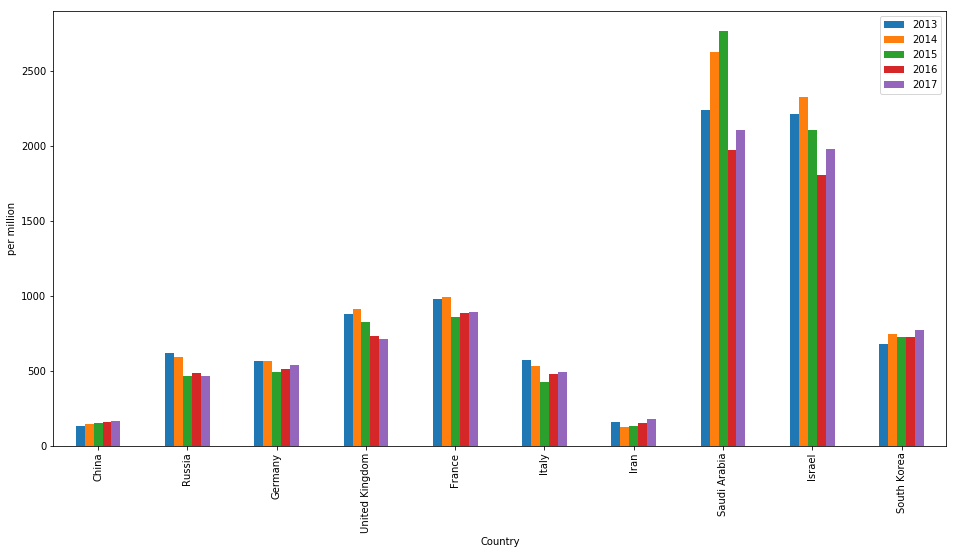

In [40]:
plot_percapita(per_cap_milit10)

In [41]:
#clean the dataset and pick out 10 countries of interest
gdp_per_cap10 = gdp_per_capita.iloc[[38, 200, 53, 79, 75, 114, 110, 203, 113, 124], [0, 57, 58, 59, 60, 61]]
gdp_per_cap10

,Country Name,2013,2014,2015,2016,2017
38,China,7077.770765,7683.502613,8069.213024,8117.267465,8826.994096
200,Russian Federation,16007.089990,14125.908730,9329.290713,8748.368853,10743.096590
53,Germany,46530.911430,48042.563430,41323.921500,42232.574210,44469.909060
79,United Kingdom,42724.067880,46783.469220,44305.554630,40412.033620,39720.443430
75,France,42592.951520,43008.652570,36613.375220,36870.219130,38476.658640
114,Italy,35370.275260,35396.665720,30180.321510,30668.981430,31952.975920
110,"Iran, Islamic Rep.",6036.192088,5540.984136,4862.299729,5219.109805,5415.209635
203,Saudi Arabia,24934.386140,24575.403040,20732.861720,19982.085630,20760.906010
113,Israel,36291.232110,37539.951820,35690.963080,37180.849810,40270.251350
124,"Korea, Rep.",25890.018670,27811.366380,27105.076230,27608.247430,29742.838860


In [42]:
# We assign the same name to each observation in order to maintain consistency
gdp_per_cap10['Country Name'] = ['China', 'Russia', 'Germany', 'United Kingdom', 'France', 'Italy', 'Iran', 'Saudi Arabia', 'Israel', 'South Korea']

In [43]:
# We assign new column names in order to maintain consistency
gdp_per_cap10.columns = ['Country', '2013', '2014', '2015', '2016', '2017']

In [44]:
gdp_per_cap10 = gdp_per_cap10.reset_index()
gdp_per_cap10

,index,Country,2013,2014,2015,2016,2017
0,38,China,7077.770765,7683.502613,8069.213024,8117.267465,8826.994096
1,200,Russia,16007.089990,14125.908730,9329.290713,8748.368853,10743.096590
2,53,Germany,46530.911430,48042.563430,41323.921500,42232.574210,44469.909060
3,79,United Kingdom,42724.067880,46783.469220,44305.554630,40412.033620,39720.443430
4,75,France,42592.951520,43008.652570,36613.375220,36870.219130,38476.658640
5,114,Italy,35370.275260,35396.665720,30180.321510,30668.981430,31952.975920
6,110,Iran,6036.192088,5540.984136,4862.299729,5219.109805,5415.209635
7,203,Saudi Arabia,24934.386140,24575.403040,20732.861720,19982.085630,20760.906010
8,113,Israel,36291.232110,37539.951820,35690.963080,37180.849810,40270.251350
9,124,South Korea,25890.018670,27811.366380,27105.076230,27608.247430,29742.838860


In [45]:
#remove unnecessary columns or variables
del gdp_per_cap10['index']

In [46]:
gdp_per_cap10 = gdp_per_cap10.set_index('Country')

In [47]:
gdp_per_cap10

,2013,2014,2015,2016,2017
Country,,,,,
China,7077.770765,7683.502613,8069.213024,8117.267465,8826.994096
Russia,16007.089990,14125.908730,9329.290713,8748.368853,10743.096590
Germany,46530.911430,48042.563430,41323.921500,42232.574210,44469.909060
United Kingdom,42724.067880,46783.469220,44305.554630,40412.033620,39720.443430
France,42592.951520,43008.652570,36613.375220,36870.219130,38476.658640
Italy,35370.275260,35396.665720,30180.321510,30668.981430,31952.975920
Iran,6036.192088,5540.984136,4862.299729,5219.109805,5415.209635
Saudi Arabia,24934.386140,24575.403040,20732.861720,19982.085630,20760.906010
Israel,36291.232110,37539.951820,35690.963080,37180.849810,40270.251350


C:\Users\Aluya\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


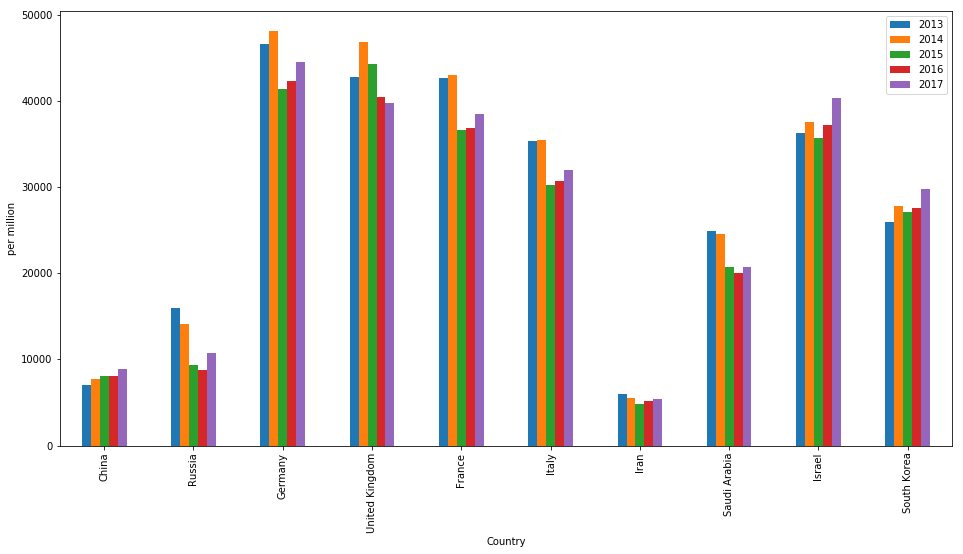

In [48]:
plot_percapita(gdp_per_cap10)

In [49]:
gdp_per_cap10.head(2)

,2013,2014,2015,2016,2017
Country,,,,,
China,7077.770765,7683.502613,8069.213024,8117.267465,8826.994096
Russia,16007.089990,14125.908730,9329.290713,8748.368853,10743.096590


In [50]:
per_cap_milit10.head(2)

,2013,2014,2015,2016,2017
Country,,,,,
China,130.1,144.4,153.2,153.9,161.9
Russia,615.3,589.1,461.6,481.0,460.7


#### checked the dataframes and decided to join them on their index

In [51]:
# join the military spending per capita data and Gdp per capita data
df_data = gdp_per_cap10.join(per_cap_milit10, lsuffix= '_gdp per capita')
df_data.head()

,2013_gdp per capita,2014_gdp per capita,2015_gdp per capita,2016_gdp per capita,2017_gdp per capita,2013,2014,2015,2016,2017
Country,,,,,,,,,,
China,7077.770765,7683.502613,8069.213024,8117.267465,8826.994096,130.1,144.4,153.2,153.9,161.9
Russia,16007.089990,14125.908730,9329.290713,8748.368853,10743.096590,615.3,589.1,461.6,481.0,460.7
Germany,46530.911430,48042.563430,41323.921500,42232.574210,44469.909060,565.2,565.7,487.3,507.6,539.8
United Kingdom,42724.067880,46783.469220,44305.554630,40412.033620,39720.443430,879.7,910.3,823.6,731.4,713.1
France,42592.951520,43008.652570,36613.375220,36870.219130,38476.658640,976.5,991.0,858.6,886.2,889.1


C:\Users\Aluya\Anaconda\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


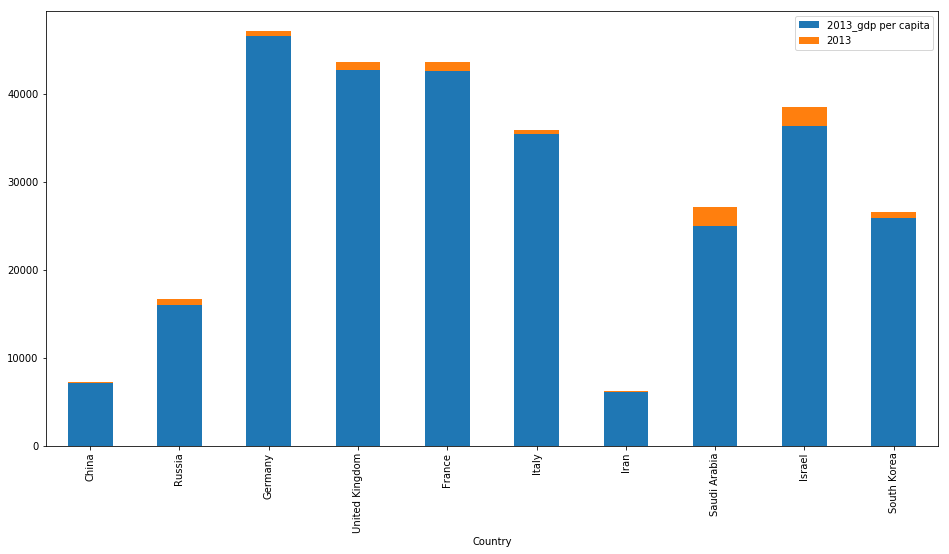

In [52]:
# plot a stacked bar plot to visualize the ratio of military spending to gdp per capita
df_data.plot.bar(y = ['2013_gdp per capita', '2013'], stacked=True)

C:\Users\Aluya\Anaconda\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


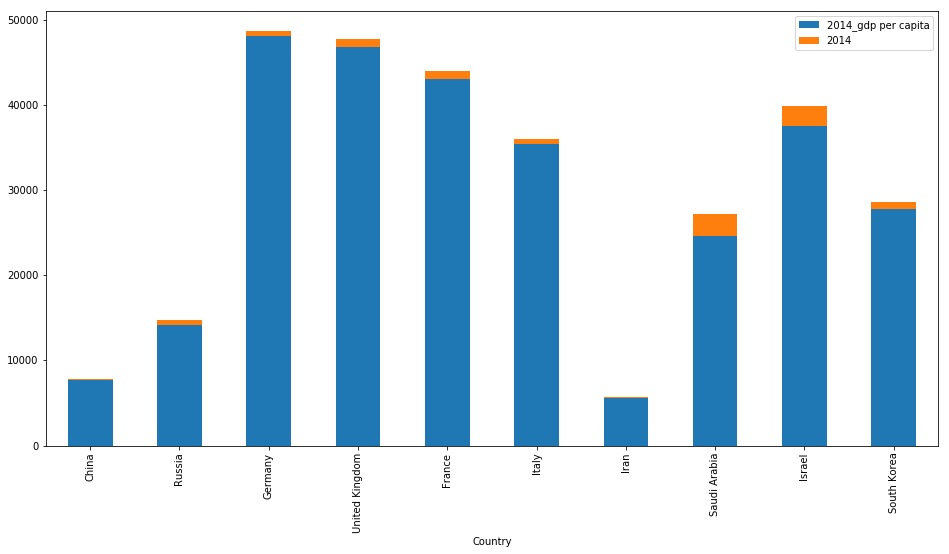

In [53]:
# stacked bar plot for 2014
df_data.plot.bar(y = ['2014_gdp per capita', '2014'], stacked=True)

C:\Users\Aluya\Anaconda\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


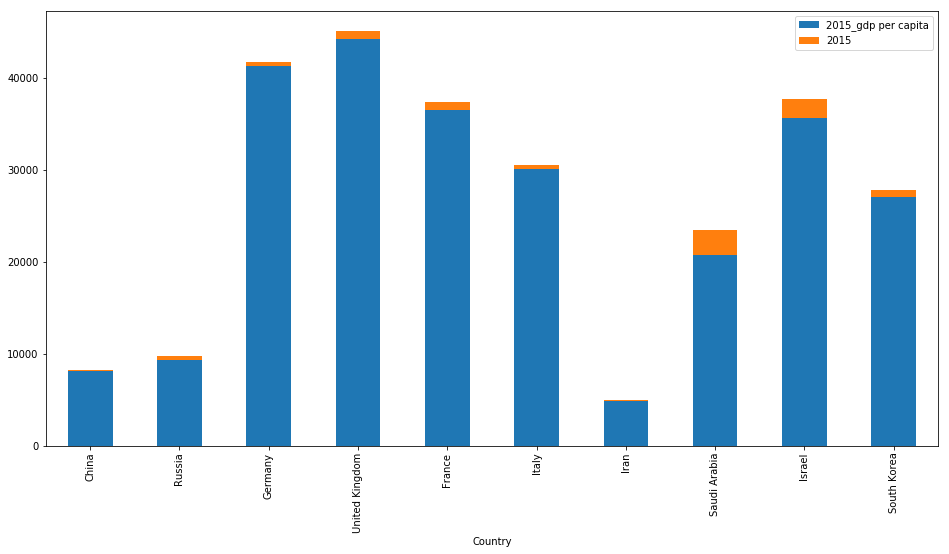

In [54]:
# stacked bar plot for 2015
df_data.plot.bar(y = ['2015_gdp per capita', '2015'], stacked=True)

C:\Users\Aluya\Anaconda\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


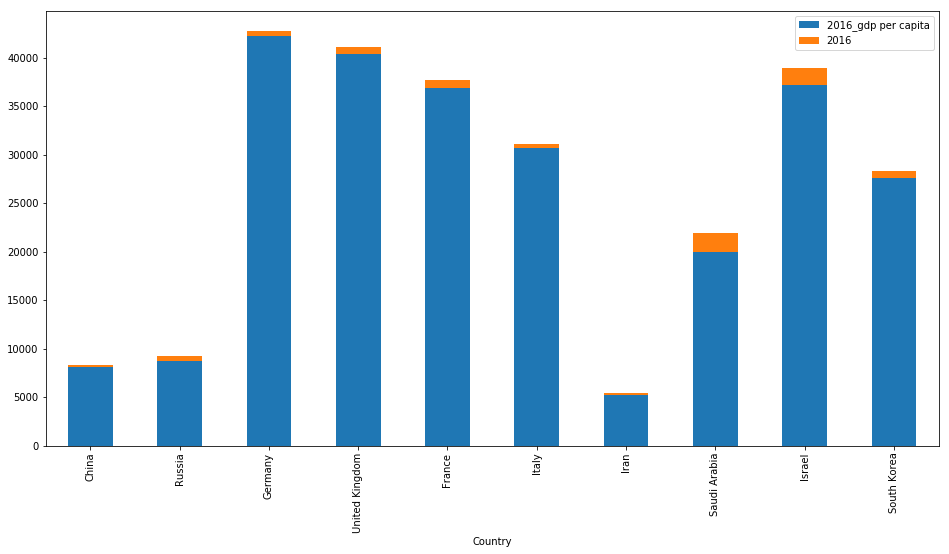

In [55]:
# stacked bar plot for 2016
df_data.plot.bar(y = ['2016_gdp per capita', '2016'], stacked=True)

C:\Users\Aluya\Anaconda\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


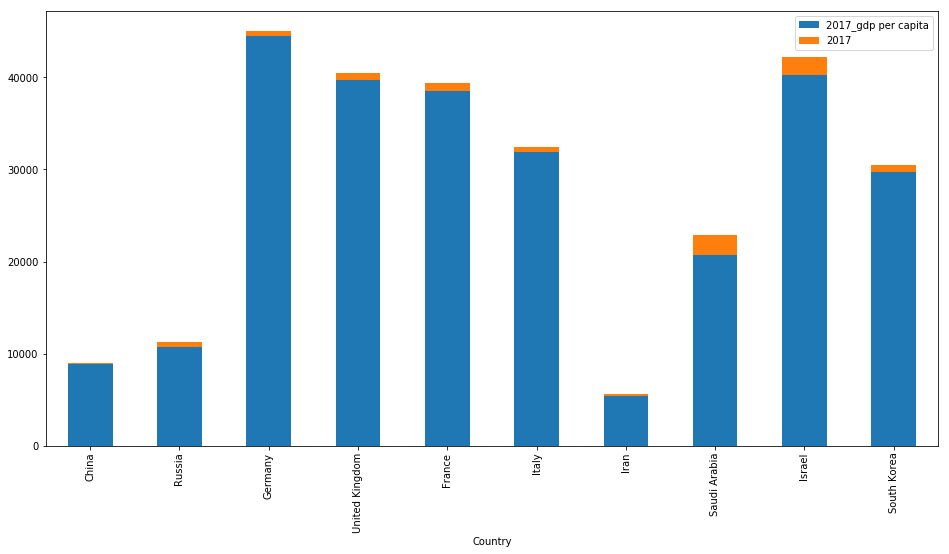

In [56]:
# stacked bar plot for 2017
df_data.plot.bar(y = ['2017_gdp per capita', '2017'], stacked=True)

### E. Single out the fastest growing countries in military spending in fixed value and in percentage

In [57]:
cont10.head()

,2013,2014,2015,2016,2017
Country,,,,,
China,179880.5,200772.2,214093.1,216031.3,228230.7
Russia,88352.9,84696.5,66418.7,69245.3,66335.0
Germany,45930.5,46102.7,39812.6,41579.5,44329.3
United Kingdom,56861.8,59182.9,53862.2,48118.9,47193.1
France,62417.1,63613.6,55342.1,57358.4,57770.1


In [58]:
# Create columns to show the change in military expenditure annually for each country
# then create a column showing total difference. 
cont10['delta(13 - 14)'] = cont10['2014'] - cont10['2013']
cont10['delta(14 - 15)'] = cont10['2015'] - cont10['2014']
cont10['delta(15 - 16'] = cont10['2016'] - cont10['2015']
cont10['delta(16 -17)'] = cont10['2017'] - cont10['2016']
cont10['Total change 2013-2017']= cont10['2017'] - cont10['2013']

cont10.head()

,2013,2014,2015,2016,2017,delta(13 - 14),delta(14 - 15),delta(15 - 16,delta(16 -17),Total change 2013-2017
Country,,,,,,,,,,
China,179880.5,200772.2,214093.1,216031.3,228230.7,20891.7,13320.9,1938.2,12199.4,48350.2
Russia,88352.9,84696.5,66418.7,69245.3,66335.0,-3656.4,-18277.8,2826.6,-2910.3,-22017.9
Germany,45930.5,46102.7,39812.6,41579.5,44329.3,172.2,-6290.1,1766.9,2749.8,-1601.2
United Kingdom,56861.8,59182.9,53862.2,48118.9,47193.1,2321.1,-5320.7,-5743.3,-925.8,-9668.7
France,62417.1,63613.6,55342.1,57358.4,57770.1,1196.5,-8271.5,2016.3,411.7,-4647.0


In [59]:
# insert the columns showing yearly change into a new dataframe 
deltacont10 = cont10.iloc[:, [5, 6, 7, 8]]
deltacont10

,delta(13 - 14),delta(14 - 15),delta(15 - 16,delta(16 -17)
Country,,,,
China,20891.7,13320.9,1938.2,12199.4
Russia,-3656.4,-18277.8,2826.6,-2910.3
Germany,172.2,-6290.1,1766.9,2749.8
United Kingdom,2321.1,-5320.7,-5743.3,-925.8
France,1196.5,-8271.5,2016.3,411.7
Italy,-2319.5,-6277.8,2911.2,1030.6
Iran,-2096.1,687.7,1675.2,2284.1
Saudi Arabia,13742.4,6423.5,-23513.1,5740.5
Israel,1178.9,-1517.9,-2180.4,1706.2


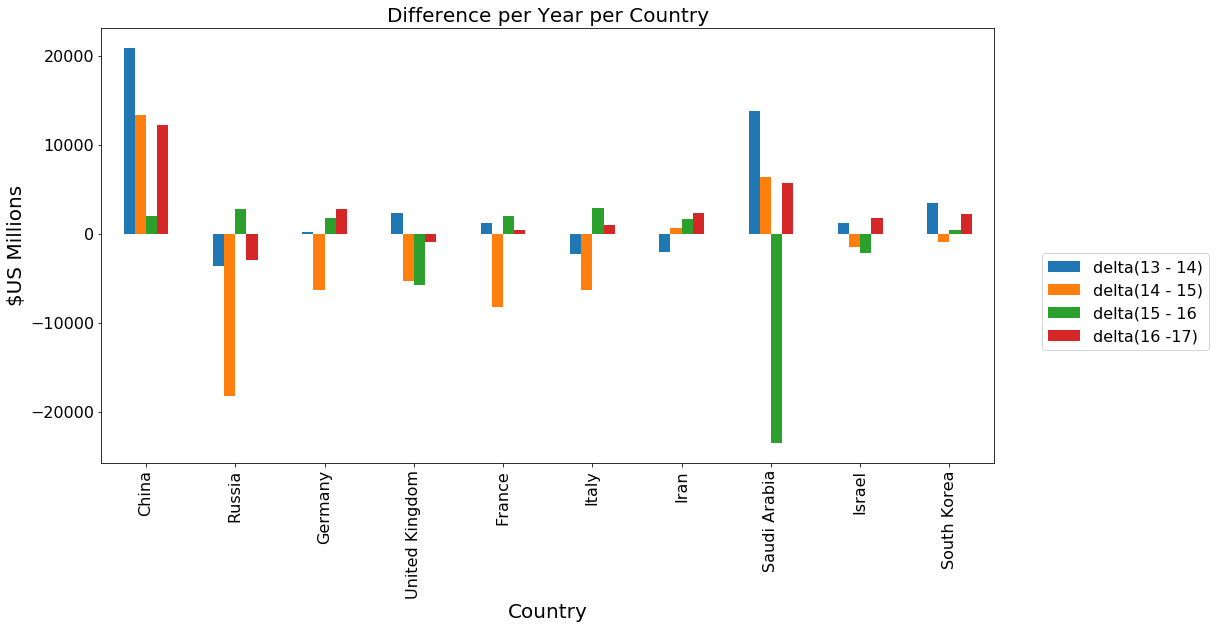

In [60]:
#Plot the annual change
deltacont10.plot(kind='bar')
plt.ylabel('$US Millions', fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.title('Difference per Year per Country', fontsize=20)
plt.legend(loc=1, prop={'size': 16}, bbox_to_anchor=(1.25,0.5))
plt.tick_params(labelsize=16)
plt.xticks(np.arange(10), ('China', 'Russia', 'Germany', 'United Kingdom', 'France', 'Italy',
                           'Iran', 'Saudi Arabia', 'Israel', 'South Korea'), rotation='vertical')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.show()

In [61]:
# insert the total change from year 2013 to 2017 into aa new dataframe
totalchange_cont10 = cont10.iloc[:, 9]

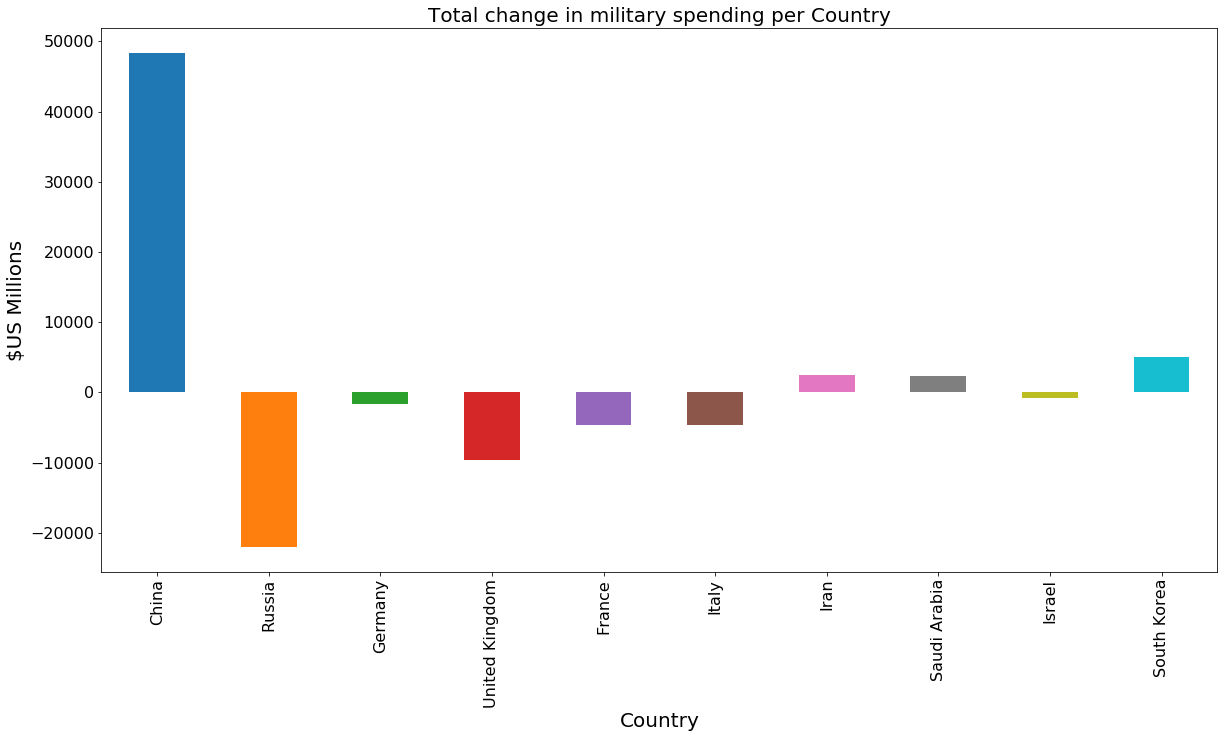

In [62]:
# Plot the change over the years from 2013 to 2017 inclusive
totalchange_cont10.plot(kind='bar')
plt.ylabel('$US Millions', fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.title('Total change in military spending per Country', fontsize=20)
plt.tick_params(labelsize=16)
plt.xticks(np.arange(10), ('China', 'Russia', 'Germany', 'United Kingdom', 'France', 'Italy',
                           'Iran', 'Saudi Arabia', 'Israel', 'South Korea'), rotation='vertical')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.show()

### Percenage change

In [63]:
# Transpose the data frame for using the percent change function
cont10_T = cont10.T

# Find the percent change between years
cont10pct = cont10_T.pct_change()
cont10pct = cont10pct.iloc[1:]

# Multiply by 100 to see the percentage
cont10pct = cont10pct*100
cont10pct

Country,China,Russia,Germany,United Kingdom,France,Italy,Iran,Saudi Arabia,Israel,South Korea
2014,11.614211,-4.138404,0.374914,4.082002,1.916943,-6.843818,-17.471577,20.504924,6.813584,10.005976
2015,6.634833,-21.580349,-13.643669,-8.990266,-13.002723,-19.883823,6.945693,7.953577,-8.213256,-2.613688
2016,0.905307,4.255729,4.438042,-10.662951,3.643338,11.509176,15.820490,-26.968925,-12.853707,0.994236
2017,5.647052,-4.202885,6.613355,-1.923984,0.717768,3.653858,18.624429,9.015624,11.541792,6.005512
delta(13 - 14),-90.846236,-105.512022,-99.611544,-95.081696,-97.928859,-107.933603,-114.408067,-80.202065,-92.850385,-91.275908
delta(14 - 15),-36.238315,399.885133,-3752.787456,-329.231830,-791.307982,170.653158,-132.808549,-53.257801,-228.755620,-128.734959
delta(15 - 16,-85.449932,-115.464662,-128.090173,7.942564,-124.376473,-146.372933,143.594591,-466.048105,43.645826,-137.045339
delta(16 -17),529.419049,-202.961155,55.628502,-83.880348,-79.581411,-64.598791,36.347899,-124.414050,-178.251697,510.038504
Total change 2013-2017,296.332607,656.550871,-158.229689,944.361633,-1228.734515,-551.727149,11.680750,-58.308510,-147.661470,126.134980


In [64]:
# drop the irrelelvant variables
cont10pct = cont10pct.drop(['delta(13 - 14)', 'delta(14 - 15)', 'delta(15 - 16', 'delta(16 -17)', 'Total change 2013-2017'])

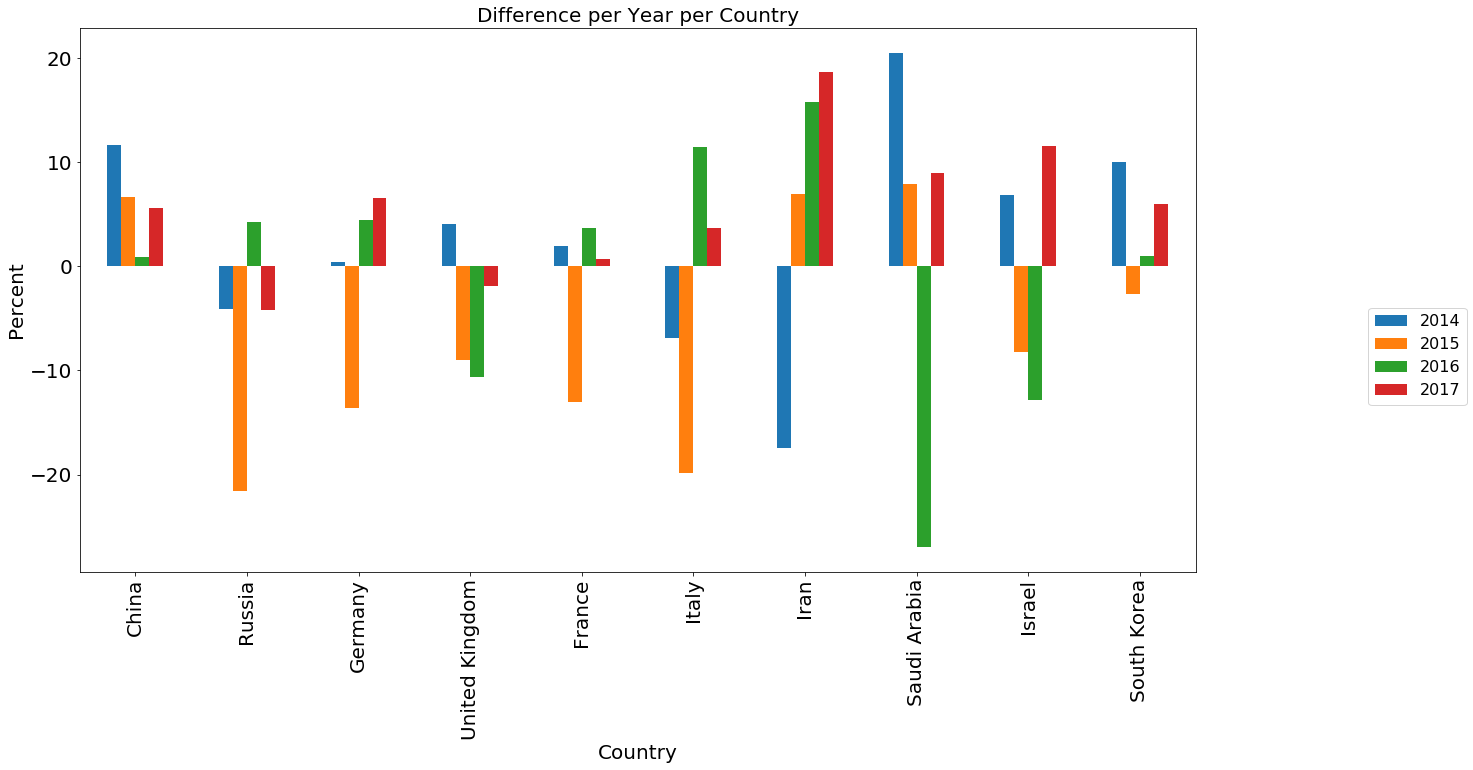

In [65]:
# Transpose the dataframe to ensure that countries are plotted on the x-axis
cont10pct=cont10pct.T

#Plot the difference per year
cont10pct.plot(kind='bar')
plt.ylabel('Percent', fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.title('Difference per Year per Country', fontsize=20)
plt.legend(loc=1, prop={'size': 16}, bbox_to_anchor=(1.25,0.5))
plt.tick_params(labelsize=20)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.show()

In [66]:
cont10.head()

,2013,2014,2015,2016,2017,delta(13 - 14),delta(14 - 15),delta(15 - 16,delta(16 -17),Total change 2013-2017
Country,,,,,,,,,,
China,179880.5,200772.2,214093.1,216031.3,228230.7,20891.7,13320.9,1938.2,12199.4,48350.2
Russia,88352.9,84696.5,66418.7,69245.3,66335.0,-3656.4,-18277.8,2826.6,-2910.3,-22017.9
Germany,45930.5,46102.7,39812.6,41579.5,44329.3,172.2,-6290.1,1766.9,2749.8,-1601.2
United Kingdom,56861.8,59182.9,53862.2,48118.9,47193.1,2321.1,-5320.7,-5743.3,-925.8,-9668.7
France,62417.1,63613.6,55342.1,57358.4,57770.1,1196.5,-8271.5,2016.3,411.7,-4647.0


In [67]:
# Add the total percent change column
cont10['Total Percent Change'] = ((cont10['2017']-cont10['2013'])/cont10['2013'])*100

# Insert the 'Total Percent Change' column to a new dataframe
cont10pcttot = cont10.iloc[:, list(range(0))+[-1]]
cont10pcttot

,Total Percent Change
Country,
China,26.879067
Russia,-24.920404
Germany,-3.486137
United Kingdom,-17.003858
France,-7.445075
Italy,-13.736320
Iran,21.262461
Saudi Arabia,3.571024
Israel,-4.699980


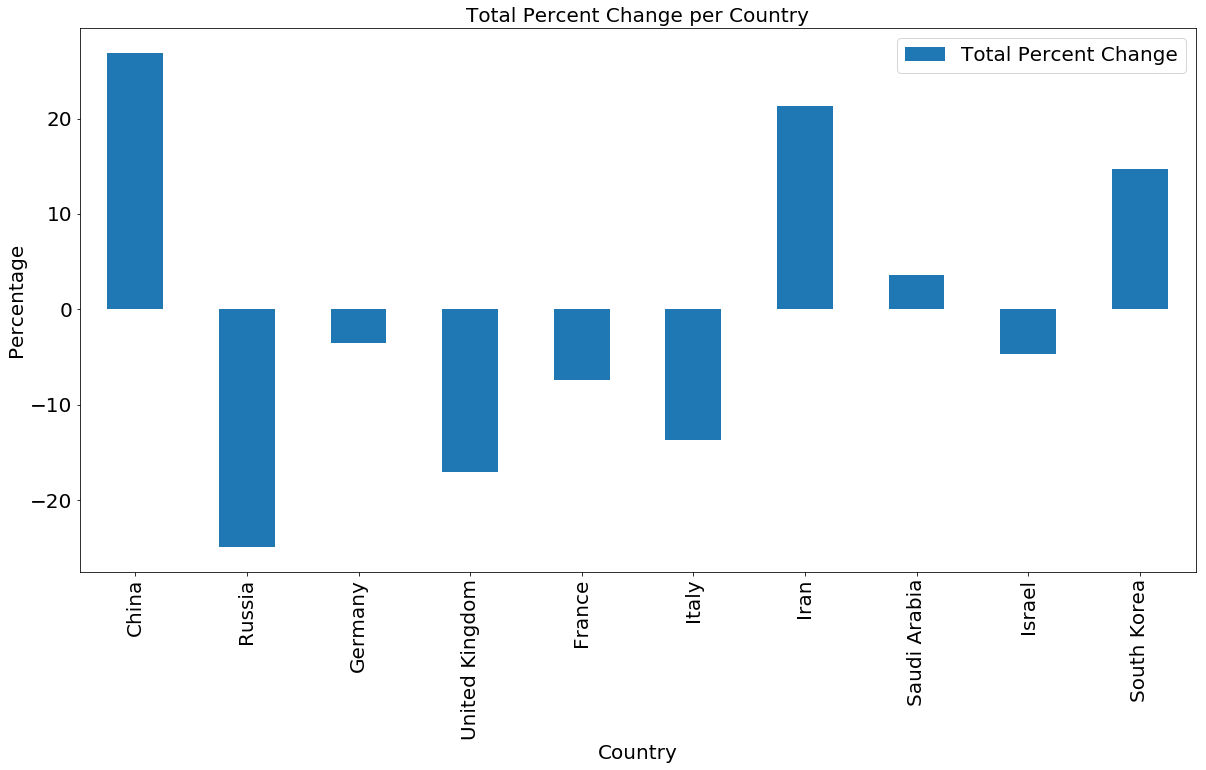

In [68]:
# Plot the total difference
cont10pcttot.plot(kind='bar')
plt.ylabel('Percentage', fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.title('Total Percent Change per Country', fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(loc=1, prop={'size': 20})
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.show()